In [ ]:
`# ======================================================
# BLACKGRAM DATA PREPROCESSING SCRIPT
# ======================================================

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import shutil
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# ======================================================
# STEP 1: PATH SETUP
# ======================================================
BASE_PATH = '/content/drive/MyDrive/CapStoneProjectDataSets'
INPUT_PATH = f'{BASE_PATH}/Blackgram'
OUTPUT_PATH = f'{BASE_PATH}/Blackgram_split'  # Preprocessed data folder

IMG_SIZE = (224, 224)
TEST_RATIO = 0.2

# ======================================================
# STEP 2: DELETE EXISTING PREPROCESSED DATA
# ======================================================
if os.path.exists(OUTPUT_PATH):
    shutil.rmtree(OUTPUT_PATH)
    print(f"🧹 Deleted existing folder: {OUTPUT_PATH}")
else:
    print(f"✅ No existing preprocessed folder found at: {OUTPUT_PATH}")

os.makedirs(f"{OUTPUT_PATH}/train", exist_ok=True)
os.makedirs(f"{OUTPUT_PATH}/test", exist_ok=True)

# ======================================================
# STEP 3: FETCH CLASSES
# ======================================================
classes = [d for d in os.listdir(INPUT_PATH)
           if os.path.isdir(os.path.join(INPUT_PATH, d))
           and d.lower() not in ['blackgram_split', 'preprocessed_data']]

print("📁 Found Classes:", classes)

# ======================================================
# STEP 4: SPLIT, RESIZE, SAVE
# ======================================================
for cls in classes:
    cls_path = os.path.join(INPUT_PATH, cls)
    images = [os.path.join(cls_path, f) for f in os.listdir(cls_path)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"\n🧾 Processing Class: {cls} ({len(images)} images)")

    if len(images) == 0:
        print(f"⚠️ No images found in {cls}, skipping...")
        continue

    train_imgs, test_imgs = train_test_split(images, test_size=TEST_RATIO, random_state=42)

    for split_name, split_data in zip(['train', 'test'], [train_imgs, test_imgs]):
        out_dir = os.path.join(OUTPUT_PATH, split_name, cls)
        os.makedirs(out_dir, exist_ok=True)

        for img_path in tqdm(split_data, desc=f"{split_name.capitalize()} - {cls}"):
            try:
                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, IMG_SIZE)
                cv2.imwrite(os.path.join(out_dir, os.path.basename(img_path)),
                            cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
            except Exception as e:
                print(f"❌ Error processing {img_path}: {e}")

print("\n✅ Preprocessing Complete!")
print(f"📦 Data saved to: {OUTPUT_PATH}")


Mounted at /content/drive
🧹 Deleted existing folder: /content/drive/MyDrive/CapStoneProjectDataSets/Blackgram_split
📁 Found Classes: ['Yellow Mosaic 220', 'Leaf Crinckle 150', 'Powdery Mildew 180', 'Healthy 220', 'Anthracnose 230']

🧾 Processing Class: Yellow Mosaic 220 (224 images)


Test - Yellow Mosaic 220: 100%|██████████| 45/45 [00:00<00:00, 62.69it/s]



🧾 Processing Class: Leaf Crinckle 150 (152 images)


Test - Leaf Crinckle 150: 100%|██████████| 31/31 [00:00<00:00, 58.32it/s]



🧾 Processing Class: Powdery Mildew 180 (180 images)


Test - Powdery Mildew 180: 100%|██████████| 36/36 [00:00<00:00, 60.76it/s]



🧾 Processing Class: Healthy 220 (221 images)


Test - Healthy 220: 100%|██████████| 45/45 [00:00<00:00, 56.64it/s]



🧾 Processing Class: Anthracnose 230 (231 images)


Test - Anthracnose 230: 100%|██████████| 47/47 [00:00<00:00, 60.38it/s]


✅ Preprocessing Complete!
📦 Data saved to: /content/drive/MyDrive/CapStoneProjectDataSets/Blackgram_split


Mounted at /content/drive
🧹 Deleted old model file: /content/drive/MyDrive/CapStoneProjectDataSets/blackgram_best_model.keras
🧹 Deleted old model file: /content/drive/MyDrive/CapStoneProjectDataSets/blackgram_final_model_100epochs.keras
Found 804 images belonging to 5 classes.
Found 204 images belonging to 5 classes.

✅ Detected Classes: {'Anthracnose 230': 0, 'Healthy 220': 1, 'Leaf Crinckle 150': 2, 'Powdery Mildew 180': 3, 'Yellow Mosaic 220': 4}


/tmp/ipython-input-2813729458.py:93: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)



🚀 Starting Optimized Training (100 Epochs)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2872 - loss: 1.9192
Epoch 1: val_accuracy improved from -inf to 0.50490, saving model to /content/drive/MyDrive/CapStoneProjectDataSets/blackgram_best_model.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.2884 - loss: 1.9149 - val_accuracy: 0.5049 - val_loss: 1.3133 - learning_rate: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.99999844111277e-05.
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5827 - loss: 1.1553
Epoch 2: val_accuracy improved from 0.50490 to 0.62745, saving model to /content/drive/MyDrive/CapStoneProjectDataSets/blackgram_best_model.keras
51/51 ━━━━━━━━━━━━━━━━━━━━ 21s 402ms/step - accuracy: 0.5837 - loss: 1.1541 - val_accuracy: 0.6275 - val_loss: 1.1261 - learning_rate: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999715021933996e-05.
Epoch 3/100
51/51 ━━━━━━━━

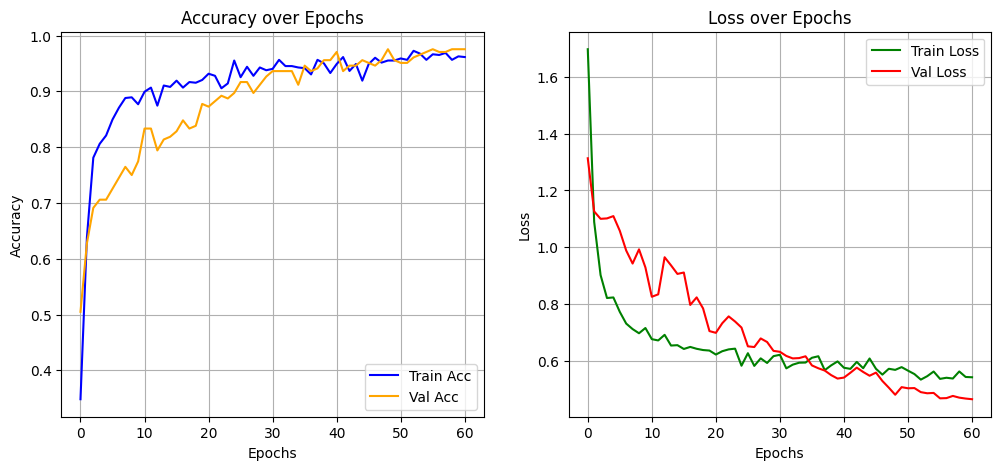

In [ ]:
# ======================================================
# Optimized Hybrid EfficientNetB0 + MobileNetV2 - Blackgram (Target >93%)
# ======================================================

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Concatenate, Input, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import math

# ======================================================
# Paths & Parameters
# ======================================================
BASE_PATH = "/content/drive/MyDrive/CapStoneProjectDataSets/Blackgram_split"
TRAIN_DIR = f"{BASE_PATH}/train"
TEST_DIR  = f"{BASE_PATH}/test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 100
INIT_LR = 1e-4

best_model_path  = "/content/drive/MyDrive/CapStoneProjectDataSets/blackgram_best_model.keras"
final_model_path = "/content/drive/MyDrive/CapStoneProjectDataSets/blackgram_final_model_100epochs.keras"

# ======================================================
# Clean Old Models
# ======================================================
for path in [best_model_path, final_model_path]:
    if os.path.exists(path):
        os.remove(path)
        print(f"🧹 Deleted old model file: {path}")

# ======================================================
# Data Augmentation
# ======================================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    channel_shift_range=20,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_gen.class_indices)
print("\n✅ Detected Classes:", train_gen.class_indices)

# ======================================================
# Hybrid Model Architecture (Enhanced Fine-tuning)
# ======================================================
input_tensor = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# EfficientNetB0
effnet = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
for layer in effnet.layers[-80:]:  # unfreeze last 80 layers
    layer.trainable = True
effnet_feat = GlobalAveragePooling2D()(effnet.output)

# MobileNetV2
mobilenet = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)
for layer in mobilenet.layers[-80:]:
    layer.trainable = True
mobilenet_feat = GlobalAveragePooling2D()(mobilenet.output)

# Combine both features
combined = Concatenate()([effnet_feat, mobilenet_feat])

x = Dense(1024)(combined)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.6)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.5)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(0.4)(x)

output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)

# ======================================================
# Compile Model with Cosine Annealing LR Schedule
# ======================================================
def cosine_annealing(epoch, total_epochs=EPOCHS, lr_max=INIT_LR, lr_min=1e-6):
    return lr_min + 0.5 * (lr_max - lr_min) * (1 + math.cos(math.pi * epoch / total_epochs))

lr_scheduler = LearningRateScheduler(cosine_annealing, verbose=1)

model.compile(
    optimizer=Adam(INIT_LR),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# ======================================================
# Callbacks
# ======================================================
callbacks = [
    lr_scheduler,
    EarlyStopping(monitor='val_accuracy', patience=12, restore_best_weights=True, verbose=1),
    ModelCheckpoint(best_model_path, monitor='val_accuracy', save_best_only=True, verbose=1)
]

# ======================================================
# Training
# ======================================================
print("\n🚀 Starting Optimized Training (100 Epochs)...")
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=EPOCHS,
    callbacks=callbacks,
    verbose=1
)

# ======================================================
# Save Model
# ======================================================
model.save(final_model_path)
print(f"\n✅ Final model saved at: {final_model_path}")

# ======================================================
# Evaluation
# ======================================================
y_true = test_gen.classes
preds = model.predict(test_gen, verbose=0)
y_pred = np.argmax(preds, axis=1)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_true, y_pred)

# Specificity Calculation
spec_list = []
total = np.sum(cm)
for i in range(num_classes):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    TN = total - TP - FP - FN
    spec_list.append(TN / (TN + FP + 1e-7))
spec = np.mean(spec_list)

print("\n📊 === FINAL TEST PERFORMANCE METRICS ===")
print(f"✅ Accuracy: {acc * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall (Sensitivity): {rec * 100:.2f}%")
print(f"Specificity: {spec * 100:.2f}%")

# ======================================================
# Plot Curves
# ======================================================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='green')
plt.plot(history.history['val_loss'], label='Val Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Mounted at /content/drive
📦 Loading trained model...
✅ Model loaded successfully from: /content/drive/MyDrive/CapStoneProjectDataSets/blackgram_final_model_100epochs.keras
Found 204 images belonging to 5 classes.

🔍 Evaluating model on test dataset...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step

📊 === FINAL BLACKGRAM TEST PERFORMANCE METRICS ===
✅ Accuracy: 97.55%
Precision: 98.00%
Recall (Sensitivity): 97.58%
Specificity: 99.37%


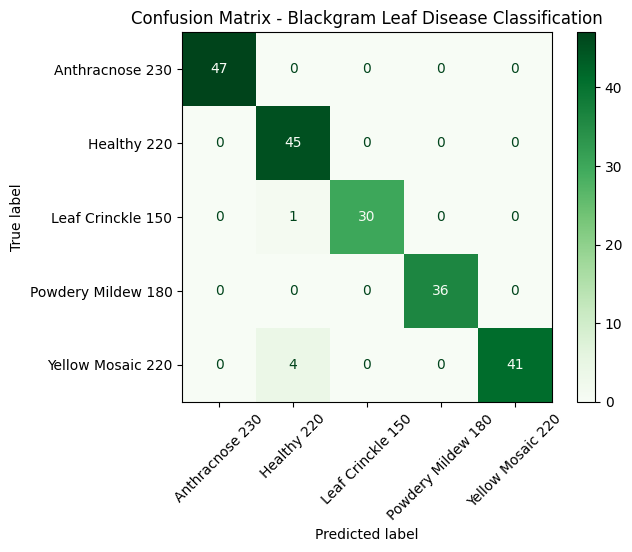


🧾 Displaying one image from each disease class with confidence:


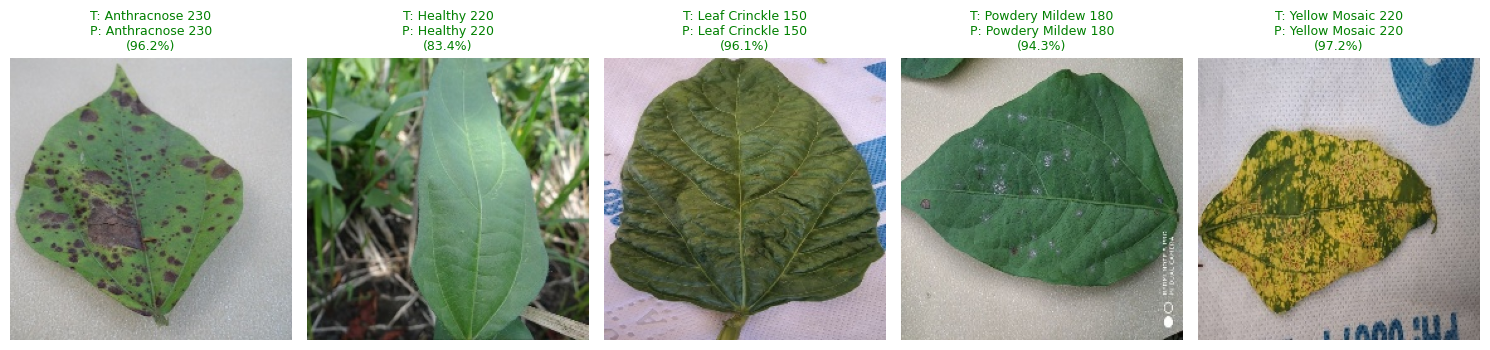

In [ ]:
# ======================================================
# Blackgram Model Testing Script — One Image per Disease with Confidence
# ======================================================

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

# ======================================================
# Paths
# ======================================================
BASE_PATH = "/content/drive/MyDrive/CapStoneProjectDataSets/Blackgram_split"
TEST_DIR = f"{BASE_PATH}/test"
MODEL_PATH = "/content/drive/MyDrive/CapStoneProjectDataSets/blackgram_final_model_100epochs.keras"

# ======================================================
# Load Model
# ======================================================
print("📦 Loading trained model...")
model = load_model(MODEL_PATH)
print(f"✅ Model loaded successfully from: {MODEL_PATH}")

# ======================================================
# Test Data Generator
# ======================================================
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# ======================================================
# Evaluate Entire Test Set
# ======================================================
print("\n🔍 Evaluating model on test dataset...")
preds = model.predict(test_gen, verbose=1)
y_true = test_gen.classes
y_pred = np.argmax(preds, axis=1)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y_true, y_pred)

# Specificity
num_classes = len(test_gen.class_indices)
spec_list = []
total = np.sum(cm)
for i in range(num_classes):
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    TN = total - TP - FP - FN
    spec_list.append(TN / (TN + FP + 1e-7))
spec = np.mean(spec_list)

print("\n📊 === FINAL BLACKGRAM TEST PERFORMANCE METRICS ===")
print(f"✅ Accuracy: {acc * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall (Sensitivity): {rec * 100:.2f}%")
print(f"Specificity: {spec * 100:.2f}%")

# ======================================================
# Confusion Matrix
# ======================================================
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_gen.class_indices.keys()))
disp.plot(cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix - Blackgram Leaf Disease Classification")
plt.show()

# ======================================================
# Display One Image per Class with Confidence
# ======================================================
print("\n🧾 Displaying one image from each disease class with confidence:")

class_labels = list(test_gen.class_indices.keys())
plt.figure(figsize=(15, 6))

for i, class_name in enumerate(class_labels):
    class_dir = os.path.join(TEST_DIR, class_name)
    sample_img = np.random.choice(os.listdir(class_dir))  # Random image from class
    img_path = os.path.join(class_dir, sample_img)

    # Load and preprocess image
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    pred_probs = model.predict(img_batch, verbose=0)
    pred_class = np.argmax(pred_probs)
    confidence = np.max(pred_probs) * 100
    pred_label = class_labels[pred_class]

    # Display
    plt.subplot(1, len(class_labels), i + 1)
    plt.imshow(img)
    plt.axis('off')

    color = 'green' if pred_label == class_name else 'red'
    plt.title(f"T: {class_name}\nP: {pred_label}\n({confidence:.1f}%)", color=color, fontsize=9)

plt.tight_layout()
plt.show()
